<a href="https://colab.research.google.com/github/sudhe-er/HandWrittenDigitRecognition/blob/main/HandwrittenDigitRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflowjs as tfjs

ModuleNotFoundError: ignored

In [2]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [3]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tensorflow-decision-forests, tensorflowjs


In [6]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import tensorflowjs as tefjs

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
#Now we will se our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (60000, 28, 28)
Dimension of x_test (10000, 28, 28)
Dimension of y_test (10000,)


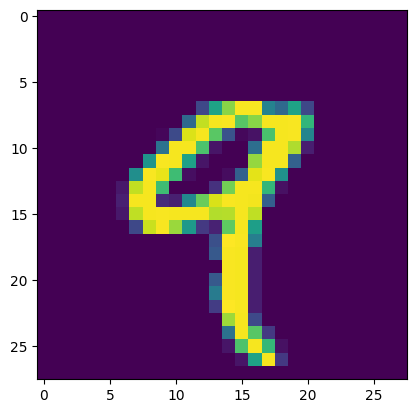

9


In [11]:
#we will see a single image in out dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[4])
plt.show()
print(y_train[4])

In [12]:
num_classes = 10
#as we have 10 classes (0-9) 
#we need to prdeict one out of 10 which has high probability
epochs = 10
img_rows = 28 
img_cols = 28
#as each image is 28 by 28 pixel

In [13]:
#normalizing image 
x_train =x_train.astype(float)
x_train =x_train/255
x_test =x_test.astype(float)
x_test =x_test/255
#y_train =y_train/255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [14]:
#format in which image are feed to our model 
#there are two cases possible either we can have channel first than image dimension
#or we can have dimension first than channel 
#we have one channel as it is a grey scale image therfore '1'
if K.image_data_format() =='channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    

In [15]:
#build our model
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [16]:
#Compile our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_1 (Batc  (None, 6, 6, 32)         1

In [19]:
#fit the model
model.fit(x_train,y_train,batch_size=614  ,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10
98/98 [==============================] - 70s 656ms/step - loss: 0.6405 - accuracy: 0.8135 - val_loss: 2.0373 - val_accuracy: 0.1113
Epoch 2/10
98/98 [==============================] - 65s 663ms/step - loss: 0.1596 - accuracy: 0.9573 - val_loss: 2.0595 - val_accuracy: 0.1701
Epoch 3/10
98/98 [==============================] - 61s 625ms/step - loss: 0.1058 - accuracy: 0.9721 - val_loss: 1.2008 - val_accuracy: 0.5211
Epoch 4/10
98/98 [==============================] - 62s 636ms/step - loss: 0.0791 - accuracy: 0.9788 - val_loss: 0.1847 - val_accuracy: 0.9371
Epoch 5/10
98/98 [==============================] - 68s 696ms/step - loss: 0.0621 - accuracy: 0.9839 - val_loss: 0.0850 - val_accuracy: 0.9726
Epoch 6/10
98/98 [==============================] - 63s 641ms/step - loss: 0.0546 - accuracy: 0.9850 - val_loss: 0.0356 - val_accuracy: 0.9879
Epoch 7/10
98/98 [==============================] - 63s 643ms/step - loss: 0.0473 - accuracy: 0.9875 - val_loss: 0.0440 - val_accuracy: 0.9856

In [20]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0223 - accuracy: 0.9923
Score is : 0.022270452231168747
Accuracy : 0.9922999739646912


In [21]:
#save our model

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.h5")

In [25]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'/Users/USER/OneDrive/Desktop/ML')